## Get Mean Housing Price

In [2]:
import json
from collections import Counter

sa3loc = ['Melbourne City', 'Port Phillip', 'Bayside', 'Glen Eira', 'Stonnington - West', 'Stonnington - East', 'Boroondara', 'Yarra', 'Darebin - South', 'Brunswick - Coburg', 'Essendon', 'Maribyrnong', 'Hobsons Bay']

def getHousingPrice2020():
    housing = {}
    f = open("data2679572621866325112.json","r")
    data = json.load(f)
    for i in data["features"]:
        if i['properties']['SA32016Name'] in sa3loc:
            housing[i['properties']['SA32016Name']]=i['properties']['Sold_Both_Auction_Private_Treaty_GeometricMeanPrice']
    house = dict(Counter(housing).most_common())
    return house

def getHousingPrice2014():
    housing = {}
    f = open("data4289994820847592257.json","r")
    data = json.load(f)
    for i in data["features"]:
        if i['properties']['SA32016Name'] in sa3loc:
            housing[i['properties']['SA32016Name']]=i['properties']['Sold_Both_Auction_Private_Treaty_GeometricMeanPrice']
    house = dict(Counter(housing).most_common())
    return house

getHousingPrice2014()

{'Boroondara': 1425383.0,
 'Stonnington - West': 1415388.0,
 'Stonnington - East': 1399581.0,
 'Bayside': 1209039.0,
 'Port Phillip': 1051848.0,
 'Glen Eira': 970306.1,
 'Yarra': 930999.6,
 'Darebin - South': 897120.6,
 'Essendon': 837987.4,
 'Melbourne City': 811915.3,
 'Brunswick - Coburg': 708164.1,
 'Maribyrnong': 629980.6,
 'Hobsons Bay': 621626.7}

In [57]:
aurin = json.loads("{}")
aurin[2014] = getHousingPrice2014()
aurin[2020] = getHousingPrice2020()

import json
f = open("aurin.json","w")
json.dump(aurin,f)
#f.write()
f.close()

{2014: {'Boroondara': 1425383.0,
  'Stonnington - West': 1415388.0,
  'Stonnington - East': 1399581.0,
  'Bayside': 1209039.0,
  'Port Phillip': 1051848.0,
  'Glen Eira': 970306.1,
  'Yarra': 930999.6,
  'Darebin - South': 897120.6,
  'Essendon': 837987.4,
  'Melbourne City': 811915.3,
  'Brunswick - Coburg': 708164.1,
  'Maribyrnong': 629980.6,
  'Hobsons Bay': 621626.7},
 2020: {'Boroondara': 1963667.0,
  'Stonnington - East': 1944068.0,
  'Stonnington - West': 1909463.0,
  'Bayside': 1684128.0,
  'Port Phillip': 1515327.0,
  'Glen Eira': 1331700.0,
  'Yarra': 1322806.0,
  'Melbourne City': 1217441.0,
  'Darebin - South': 1206792.0,
  'Essendon': 1187148.0,
  'Brunswick - Coburg': 974134.8,
  'Hobsons Bay': 880109.3,
  'Maribyrnong': 857932.1}}

## Get Tweets

In [3]:
import json
from tqdm import tqdm

def getFreq2014(query):
    count_tracker = { i : [0,0] for i in list(getHousingPrice2020().keys()) }
    #f = open("richard_tweets.json","r")
    #tweets = json.load(f)
    for each in tqdm(tweets["doc"]):
        count_tracker[each["key"][0]][1] += 1 # 1: total
        if query in each["text"]:
            count_tracker[each["key"][0]][0] += 1 # 0: freq
            
    freq = { k: round(v[0]/v[1],3) for k,v in count_tracker.items() }
    return freq

getFreq2014("melb")

NameError: name 'tweets' is not defined

In [117]:
def freqDiff(word):

    thres = 3
    docfreq = getFreq2014(word)
    houseprice = getHousingPrice2014()
    richkeys = list(houseprice.keys())[:thres]
    poorkeys = list(houseprice.keys())[-thres:]

    richave = 0
    poorave = 0
    for i in range(thres):
        richave += docfreq[richkeys[i]]
        poorave += docfreq[poorkeys[i]]
    return abs(richave-poorave)

start = time.time()

content = longtext
content = re.sub(r"http\S+", "", content)
content = content.replace('RT ', ' ').replace('&amp;', 'and')
content = re.sub('[^A-Za-z]+', ' ', content)
content = content.lower()

tokenized_word = word_tokenize(content)
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tqdm(tokenized_word):
    if w not in stop_words and len(w)>2:
        filtered_sent.append(w)


end = time.time()
print((end-start)/60, " minutes")

len(filtered_sent)

0.2624457836151123  minutes


1775298

In [121]:
doctotal = { k: 0 for k in most_freq.keys() }    
for each in tqdm(tweets["doc"]):
    doctotal[each["key"][0]] += 1

In [125]:
docfreq = { k: [] for k in most_freq.keys() }   
for k,v in most_freq.items():
    for w,f in v:
        docfreq[k] += [(w,round(f/doctotal[k],2))]

In [129]:
import pandas as pd
fdd = pd.DataFrame()#most_freq['Hobsons Bay'],columns = ["Word","Frequency"])

for k,v in docfreq.items():
    temp = pd.DataFrame(v,columns = ["w","f"])
    fdd[k] = temp["f"]
fdd

,Melbourne City,Port Phillip,Bayside,Glen Eira,Stonnington - West,Stonnington - East,Boroondara,Yarra,Darebin - South,Brunswick - Coburg,Essendon,Maribyrnong,Hobsons Bay
0,0.21,0.17,0.32,0.03,0.06,0.07,0.04,0.05,0.04,0.04,0.07,0.04,0.09
1,0.20,0.15,0.27,0.03,0.04,0.06,0.03,0.03,0.04,0.03,0.05,0.04,0.07
2,0.19,0.14,0.12,0.03,0.03,0.06,0.03,0.03,0.04,0.03,0.04,0.03,0.05
3,0.19,0.06,0.06,0.03,0.03,0.05,0.03,0.03,0.03,0.03,0.04,0.03,0.05
4,0.19,0.05,0.05,0.03,0.03,0.05,0.03,0.03,0.03,0.03,0.03,0.03,0.05
5,0.19,0.04,0.05,0.03,0.03,0.05,0.03,0.03,0.03,0.03,0.03,0.03,0.05
6,0.19,0.04,0.04,0.03,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.04
7,0.12,0.03,0.03,0.03,0.03,0.04,0.03,0.02,0.03,0.03,0.03,0.02,0.04
8,0.12,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.03,0.03,0.03,0.02,0.03
9,0.09,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.03,0.02,0.03


In [142]:
#words = {k:[] for k in getHousingPrice2014().keys()}
words={}
for k,v in docfreq.items():
    for w,f in v:
        if w not in words.keys():
            words[w] = [0,0,0,0,0,0,0,0,0,0,0,0,0]
            
for k,v in docfreq.items(): 
    i = list(getHousingPrice2014().keys()).index(k)
    for w,f in v:
        words[w][i] = f

In [143]:
words

{'melbourne': [0.03,
  0.06,
  0.06,
  0.12,
  0.15,
  0.03,
  0.05,
  0.03,
  0.07,
  0.21,
  0.04,
  0.03,
  0.04],
 'today': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2, 0, 0, 0],
 'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'humidity': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'temperature': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'barometer': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'hpa': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19, 0, 0, 0],
 'slowly': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12, 0, 0, 0],
 'wind': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12, 0, 0, 0],
 'rising': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09, 0, 0, 0],
 'kilda': [0, 0, 0, 0, 0.17, 0, 0, 0, 0, 0, 0, 0, 0],
 'beach': [0, 0, 0, 0.27, 0.14, 0, 0, 0, 0, 0, 0, 0, 0.05],
 'park': [0, 0, 0, 0, 0.06, 0, 0, 0, 0, 0, 0, 0, 0],
 'stkilda': [0, 0, 0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0, 0],
 'day': [0.03, 0.03, 0, 0.06, 0.04, 0.03, 0.03, 0.03, 0.04, 0, 0, 0.02, 0.04],
 'pls': [0, 0, 0, 0, 0.04, 0, 0, 0, 0, 0, 0, 0, 0],
 'australia': [0, 0, 0, 0.04, 0.

# feature vec, model

In [64]:
import json
f = open("richard_tweets.json","r")
tweets = json.load(f)

In [ ]:
from textblob import TextBlob

##

sentiment = TextBlob(tweet_text).sentiment
polarity = sentiment.polarity
subjectivity = sentiment.subjectivity

In [97]:
loctext = {k: "" for k in getHousingPrice2014().keys()}
for each in tqdm(tweets["doc"]):
    loctext[each["key"][0]] += each["text"]

In [99]:
import re
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

most_freq = {}
for k,v in loctext.items():
    content = v
    content = re.sub(r"http\S+", "", content)
    content = content.replace('RT ', ' ').replace('&amp;', 'and')
    content = re.sub('[^A-Za-z]+', ' ', content)
    content = content.lower()

    tokenized_word = word_tokenize(content)
    stop_words=set(stopwords.words("english"))
    filtered_sent=[]
    for w in tqdm(tokenized_word):
        if w not in stop_words and len(w)>2:
            filtered_sent.append(w)
    fdist = FreqDist(filtered_sent)
    most_freq[k] = fdist.most_common(10)
    
most_freq

{'Melbourne City': [('melbourne', 30043),
  ('today', 29365),
  ('rain', 27089),
  ('humidity', 26990),
  ('temperature', 26970),
  ('barometer', 26960),
  ('hpa', 26960),
  ('slowly', 16985),
  ('wind', 16971),
  ('rising', 12412)],
 'Port Phillip': [('kilda', 1234),
  ('melbourne', 1056),
  ('beach', 971),
  ('park', 428),
  ('stkilda', 353),
  ('day', 274),
  ('pls', 253),
  ('australia', 246),
  ('vic', 230),
  ('love', 212)],
 'Bayside': [('brighton', 741),
  ('beach', 616),
  ('melbourne', 277),
  ('day', 144),
  ('bathing', 112),
  ('boxes', 110),
  ('australia', 98),
  ('vic', 80),
  ('brightonbeach', 63),
  ('sandringham', 60)],
 'Glen Eira': [('like', 660),
  ('love', 603),
  ('vic', 575),
  ('timeline', 567),
  ('initiated', 547),
  ('good', 533),
  ('melbourne', 519),
  ('get', 514),
  ('day', 503),
  ('one', 502)],
 'Stonnington - West': [('melbourne', 1441),
  ('richmond', 838),
  ('vic', 783),
  ('day', 746),
  ('like', 716),
  ('one', 661),
  ('good', 642),
  ('new', 62

In [175]:
import pandas as pd
fd = pd.DataFrame()#most_freq['Hobsons Bay'],columns = ["Word","Frequency"])


#order = list(getHousingPrice2014().keys())

for k in list(getHousingPrice2014().keys()):

    temp = pd.DataFrame(most_freq[k],columns = ["w","f"])
    fd[k] = temp["w"]
fd

,Boroondara,Stonnington - West,Stonnington - East,Bayside,Port Phillip,Glen Eira,Yarra,Darebin - South,Essendon,Melbourne City,Brunswick - Coburg,Maribyrnong,Hobsons Bay
0,hawthorn,melbourne,timeline,brighton,kilda,like,melbourne,preston,melbourne,melbourne,melbourne,timeline,williamstown
1,love,richmond,initiated,beach,melbourne,love,collingwood,northcote,footscray,today,timeline,initiated,altona
2,melbourne,vic,melbourne,melbourne,beach,vic,vic,timeline,vic,rain,brunswick,like,beach
3,like,day,closed,day,park,timeline,new,initiated,day,humidity,initiated,good,timeline
4,timeline,like,ashburton,bathing,stkilda,initiated,like,melbourne,timeline,temperature,love,melbourne,initiated
5,vic,one,vic,boxes,day,good,day,good,initiated,barometer,like,love,good
6,day,good,lane,australia,pls,melbourne,good,like,like,hpa,one,get,melbourne
7,initiated,new,chadstone,vic,australia,get,one,day,flemington,slowly,coburg,footscray,day
8,one,love,east,brightonbeach,vic,day,richmond,get,victoria,wind,good,day,get
9,good,get,cafe,sandringham,love,one,get,one,get,rising,get,one,like


In [1]:
from matplotlib import pyplot
pyplot.bar(getHousingPrice2014().values(), getFreq2014("vic").values())

NameError: name 'getHousingPrice2014' is not defined

No handles with labels found to put in legend.


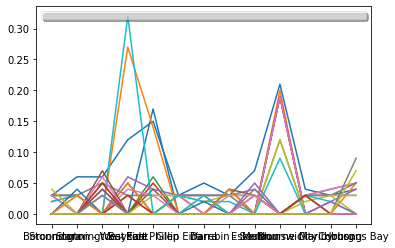

In [148]:
import matplotlib.pyplot as plt
import numpy as np


ax = plt.subplot(111)
t1 = list(getHousingPrice2014().keys())
for k,v in words.items():
    plt.plot(t1, v)#, label="k="+k)

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
plt.show()



In [110]:
import plotly.express as px
import pandas as pd
fd = pd.DataFrame(most_freq['Hobsons Bay'],columns = ["Word","Frequency"])
fig = px.bar(fd, x="Word", y="Frequency")
fig.show()

In [93]:
# for all tweets
from tqdm import tqdm
longtext = ""
for each in tqdm(tweets["doc"]):
    longtext += each["text"]
    
content = longtext
content = re.sub(r"http\S+", "", content)
content = content.replace('RT ', ' ').replace('&amp;', 'and')
content = re.sub('[^A-Za-z]+', ' ', content)
content = content.lower()
    
tokenized_word = word_tokenize(content)
stop_words=set(stopwords.words("english"))
filtered_sent=[]
for w in tqdm(tokenized_word):
    if w not in stop_words and len(w)>2:
        filtered_sent.append(w)
fdist = FreqDist(filtered_sent)
fdist.most_common(10)

[('melbourne', 35999),
 ('today', 31694),
 ('rain', 27254),
 ('humidity', 27010),
 ('temperature', 26984),
 ('barometer', 26960),
 ('hpa', 26960),
 ('wind', 17055),
 ('slowly', 17009),
 ('rising', 12442)]

# Process
1. tokenize words from twitter
2. remove stop words, lower word frequency? keep hashtags.
3. genertae feature vector
    a. for each tweet, for word in feature, if word in tweet: 1 else: 0
    b. 

In [2]:
from tqdm import tqdm
from wordfreq import word_frequency as wf
import time
import re

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def chop(word):
    word = word.lower()
    if word.startswith("http") == True or len(word)<3:
        return None
    e = re.search("[0123456789'!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~']",word)
    if e:
        if e.start() == 0 or len(word[:e.start()])<3:
            return None
        return word[:e.start()]
    return word

start = time.time()

word_list = []
for each in tqdm(tweets["doc"]):
    token = deEmojify(each["text"].lower()).split()
    
    for each in token:
        word = chop(each)
        if word != None:
            word_list += [word]

import nltk
from collections import Counter
from nltk.corpus import stopwords 
nltk.download('stopwords')

# removing stop words
unique = Counter(word_list)
features = list(unique.keys())
for each in tqdm(features):
    if each in stopwords.words('english'):
        features.remove(each)

end = time.time()
print((end-start)/60, " minutes")

[nltk_data] Downloading package stopwords to              
[nltk_data]     /Users/huangraelene/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
                                                       

0.40998250246047974  minutes


In [3]:
len(features)

87612

In [186]:
from nltk.stem import PorterStemmer
stem_features = []
porter = PorterStemmer()
for each in tqdm(features):
    stem_features.append(porter.stem(each))
len(Counter(stem_features).keys())

70113

In [5]:
freq = []
for each in features:
    if wf(each, 'en') > 0.00009:
        freq += [each]
print(len(freq))

986


In [8]:
from info_gain import info_gain

Y = []
houseprice = getHousingPrice2014()
for each in tqdm(tweets["doc"]):
    Y.append(houseprice[each["key"][0]])

X = {}

for w in tqdm(freq):
    #print("feature: ", w)
    X[w] = []
    for each in tweets["doc"]:
        s = each["text"].lower()
        if w in s:
            X[w].append(1)
        else:
            X[w].append(0)
            
    #gainratio[w] = info_gain.info_gain_ratio(X[w], Y)
    #infogain[w] = info_gain.info_gain(X[w], Y)


In [42]:
infogain = {}
for w in tqdm(X.keys()):
    infogain[w] = info_gain.info_gain(X[w], Y)

In [152]:
gr2014 = Counter(gainratio).most_common()
gr2014

[]

In [43]:
Counter(infogain).most_common()

[('met', 0.04771900912266425),
 ('today', 0.04456675838785712),
 ('win', 0.03653714186638779),
 ('per', 0.03509907956522307),
 ('day', 0.02440225123097417),
 ('fall', 0.024338401575000418),
 ('low', 0.019035395001616162),
 ('right', 0.0074935387437425754),
 ('the', 0.00504259674498575),
 ('field', 0.0029048847027584035),
 ('town', 0.002545271066535848),
 ('north', 0.002429143711033463),
 ('job', 0.002188632372386423),
 ('one', 0.0021401239131467187),
 ('park', 0.0020355441837366026),
 ('south', 0.0019089259956720644),
 ('follow', 0.0018600100087835525),
 ('east', 0.0018006612664448057),
 ('line', 0.00171823074894345),
 ('street', 0.001551440026720946),
 ('time', 0.001535524159756746),
 ('non', 0.0013864399368638536),
 ('australia', 0.0013490447631275826),
 ('west', 0.0012868534830436096),
 ('have', 0.0012676946878832085),
 ('bank', 0.0011902482936508654),
 ('box', 0.0011608863687451176),
 ('hotel', 0.001159220647949183),
 ('hey', 0.0011375666229494208),
 ('send', 0.0011221829914099743)

<BarContainer object of 13 artists>

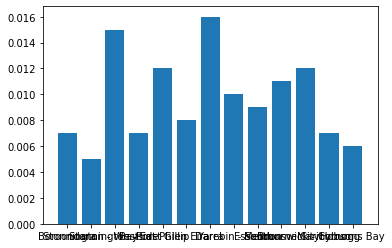

In [29]:
from matplotlib import pyplot
pyplot.bar(getHousingPrice2014().keys(), getFreq2014("bar").values())

<BarContainer object of 13 artists>

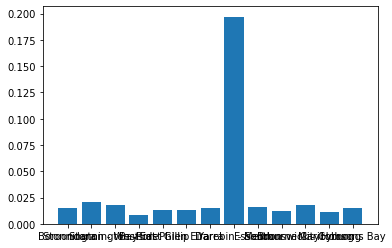

In [41]:
pyplot.bar(getHousingPrice2014().keys(), getFreq2014("met").values())

<BarContainer object of 13 artists>

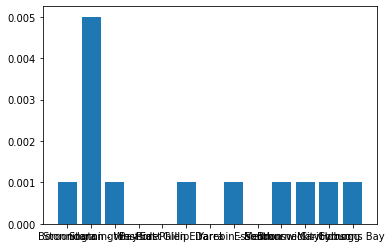

In [155]:
pyplot.bar(getHousingPrice2014().keys(), getFreq2014("michael").values())

<BarContainer object of 13 artists>

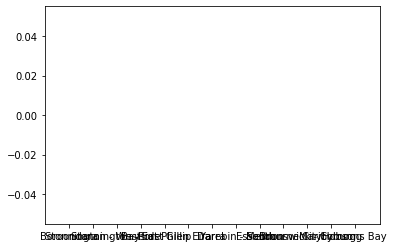

In [174]:
pyplot.bar(getHousingPrice2020().keys(), getFreq2014("university").values())

In [177]:
gr2014 = [('bar', 0.01969221684328206),
 ('met', 0.019618557081469774),
 ('win', 0.015021393287042066),
 ('per', 0.01443016752898855),
 ('day', 0.010032416169007491),
 ('fall', 0.010006165872880569),
 ('beach', 0.006367575539583402),
 ('right', 0.0030807935933542916),
 ('rich', 0.0020007818314649517),
 ('field', 0.0011942755602837264),
 ('town', 0.0010464288053066563),
 ('job', 0.001041107819219211),
 ('north', 0.0009986857529145309),
 ('one', 0.0008798620072675807),
 ('park', 0.0008368664918803476),
 ('south', 0.0007848103784830431),
 ('follow', 0.0007646997119245268),
 ('east', 0.000740299861410172),
 ('line', 0.0007064104776491131),
 ('street', 0.0006378383642556766),
 ('time', 0.0006312949269488457),
 ('non', 0.0005700024275750139),
 ('australia', 0.0005546282745067754),
 ('west', 0.0005290597809288648),
 ('bank', 0.000489342811584512),
 ('box', 0.0004772713413177153),
 ('hotel', 0.0004765865190819301),
 ('hey', 0.0004676839719982431), 
 ('send', 0.0004613593508666281),
 ('well', 0.00045653525129150794),
 ('race', 0.0004500604676509471)] #30
 

gr2020 = [('michael', 0.026283957082107123),
 ('western', 0.007721619535209237),
 ('dog', 0.007553402627090276),
 ('west', 0.007351966155076098),
 ('might', 0.004635876414366083),
 ('wife', 0.003825152228587756),
 ('hours', 0.0033357212621740644),
 ('school', 0.0031304396845475736),
 ('weeks', 0.0030248193880604434),
 ('like', 0.0028744091860470502),
 ('hour', 0.0028393672771163405),
 ('hospital', 0.002689315577859752),
 ('face', 0.0026856121651326814),
 ('ask', 0.002609361801553402),
 ('thing', 0.002606091531379975),
 ('two', 0.0024818874787135986),
 ('young', 0.002366047377870643),
 ('think', 0.002276896802341305),
 ('earth', 0.0022284464069659915),
 ('workers', 0.0021994476689465177),
 ('people', 0.0021790857057509224),
 ('job', 0.002154226039483185),
 ('allow', 0.002127596983711246),
 ('australia', 0.002034505424862161),
 ('design', 0.0017937664686581319),
 ('completely', 0.0016290258816124663),
 ('students', 0.0016240041098769574),
 ('north', 0.0016226133835445303),
 ('eat', 0.0015303374225198658),
 ('win', 0.0014829533515523844),
 ('work', 0.0014560613601797084)]
 

In [179]:
len(gr2014)

31

In [182]:
f = open("gain_ratio.json","w")

out = {"2014": gr2014, "2020": gr2020}

json.dump(out,f)

f.close()


In [183]:
f = open("gain_ratio.json","r")
a = json.load(f)


{'2014': [['bar', 0.01969221684328206],
  ['met', 0.019618557081469774],
  ['win', 0.015021393287042066],
  ['per', 0.01443016752898855],
  ['day', 0.010032416169007491],
  ['fall', 0.010006165872880569],
  ['beach', 0.006367575539583402],
  ['right', 0.0030807935933542916],
  ['rich', 0.0020007818314649517],
  ['field', 0.0011942755602837264],
  ['town', 0.0010464288053066563],
  ['job', 0.001041107819219211],
  ['north', 0.0009986857529145309],
  ['one', 0.0008798620072675807],
  ['park', 0.0008368664918803476],
  ['south', 0.0007848103784830431],
  ['follow', 0.0007646997119245268],
  ['east', 0.000740299861410172],
  ['line', 0.0007064104776491131],
  ['street', 0.0006378383642556766],
  ['time', 0.0006312949269488457],
  ['non', 0.0005700024275750139],
  ['australia', 0.0005546282745067754],
  ['west', 0.0005290597809288648],
  ['bank', 0.000489342811584512],
  ['box', 0.0004772713413177153],
  ['hotel', 0.0004765865190819301],
  ['hey', 0.0004676839719982431],
  ['send', 0.000461